# Simple Convolutional Neural Network

This notebook shows some examples of simple CNNs.

In [7]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

tf.random.set_seed(1)

Loading the Data

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Reshaping the data so it is easier to work with

In [4]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
#Normalizing the pixels
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Now we can begin our function to build our CNN. We do this to be able to run the CNN multiple times with different parameters.

In [94]:
def build_model(dense_layers, dense_hidden_units, conv_layers, pool_layers, epochs, X_train, y_train):
  model = build_cnn(conv_layers, pool_layers, dense_layers, dense_hidden_units)
  
    

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, epochs)

  return history

This builds the actual CNN.

In [95]:
def build_cnn(conv_layers, pool_layers, dense_layers, dense_hidden_units):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
    model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    for i in range(1, conv_layers-1):
      for p in range(1, pool_layers-1):
        if i <= conv_layers-1:
          model_cnn.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
        if p <= pool_layers-1:
          model_cnn.add(MaxPooling2D((2, 2), padding='same'))
    model_cnn.add(Flatten())
    for i in range(dense_layers-1):
      model_cnn.add(Dense(dense_hidden_units[i]))
    model_cnn.add(Dense(dense_hidden_units[-1], activation='softmax'))
    return model_cnn

This will plot our accuracy for analysis.

In [96]:
def plot_history(history, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.legend()
  plt.grid()

Let's run some models!

Epoch 1/10
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3024 - accuracy: 0.1111 - val_loss: 2.3095 - val_accuracy: 0.1079
Epoch 2/10
1313/1313 [==============================] - 15s 12ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3018 - val_accuracy: 0.1430
Epoch 3/10
1313/1313 [==============================] - 15s 12ms/step - loss: 2.1748 - accuracy: 0.2103 - val_loss: 1.1814 - val_accuracy: 0.6318
Epoch 4/10
1313/1313 [==============================] - 15s 11ms/step - loss: 0.6924 - accuracy: 0.7886 - val_loss: 0.4470 - val_accuracy: 0.8701
Epoch 5/10
1313/1313 [==============================] - 15s 12ms/step - loss: 0.4064 - accuracy: 0.8803 - val_loss: 0.3742 - val_accuracy: 0.8881
Epoch 6/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3308 - accuracy: 0.9022 - val_loss: 0.3081 - val_accuracy: 0.9062
Epoch 7/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2862 - accuracy: 0.9151 - val_loss: 0.2630 -

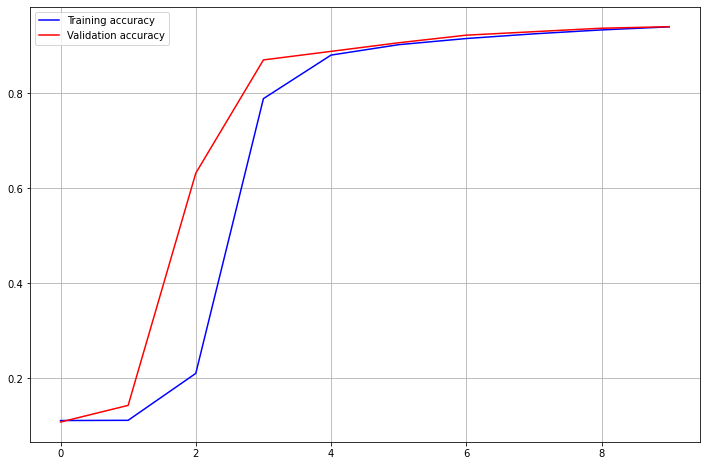

In [97]:
build_model(dense_layers=2, dense_hidden_units=[10,10], conv_layers=3, pool_layers=3, epochs=10, X_train=X_train, y_train=y_train)

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3030 - accuracy: 0.1079 - val_loss: 2.3062 - val_accuracy: 0.0909
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.2982 - val_accuracy: 0.2461
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2905 - accuracy: 0.1318 - val_loss: 2.2774 - val_accuracy: 0.1081
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2553 - accuracy: 0.2394 - val_loss: 2.2262 - val_accuracy: 0.2062
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.1870 - accuracy: 0.4365 - val_loss: 2.1376 - val_accuracy: 0.6091
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.0797 - accuracy: 0.5716 - val_loss: 2.0094 - val_accuracy: 0.6827
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 1.9374 - accuracy: 0.6583 - val_loss: 1.8517 - val_accuracy:

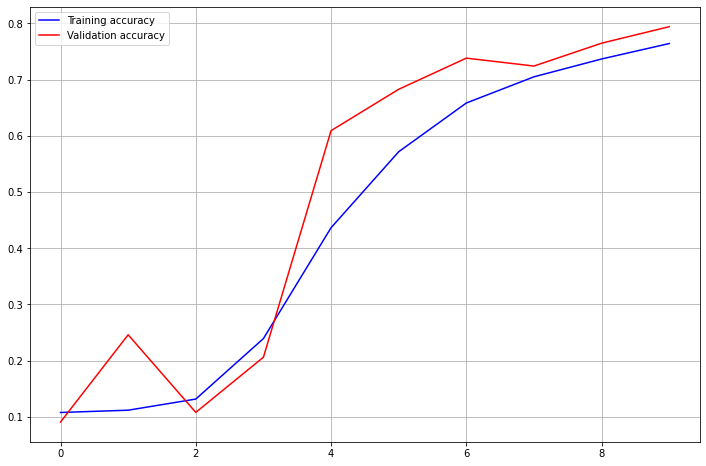

In [84]:
build_model(dense_layers=1, dense_hidden_units=[10], conv_layers=2, pool_layers=2, epochs=10, X_train=X_train, y_train=y_train)


Epoch 1/10
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3018 - accuracy: 0.1130 - val_loss: 2.3046 - val_accuracy: 0.1079
Epoch 2/10
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3016 - accuracy: 0.1126 - val_loss: 2.3021 - val_accuracy: 0.1079
Epoch 3/10
1313/1313 [==============================] - 17s 13ms/step - loss: 2.3016 - accuracy: 0.1138 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 4/10
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3032 - val_accuracy: 0.1079
Epoch 5/10
1313/1313 [==============================] - 16s 12ms/step - loss: 2.1850 - accuracy: 0.1627 - val_loss: 1.7079 - val_accuracy: 0.3440
Epoch 6/10
1313/1313 [==============================] - 16s 12ms/step - loss: 1.2427 - accuracy: 0.5254 - val_loss: 0.8988 - val_accuracy: 0.6772
Epoch 7/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.6308 - accuracy: 0.7917 - val_loss: 0.4494 -

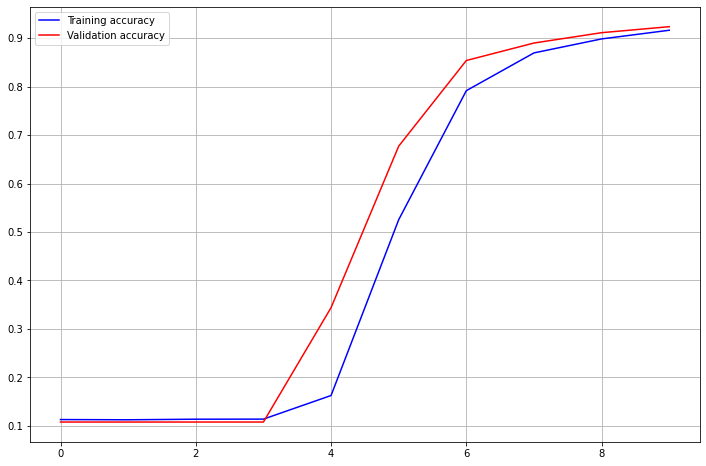

In [85]:
build_model(dense_layers=5, dense_hidden_units=[10,10,10,10,10], conv_layers=3, pool_layers=3, epochs=10, X_train=X_train, y_train=y_train)

Epoch 1/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3027 - val_accuracy: 0.1079
Epoch 2/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3015 - accuracy: 0.1142 - val_loss: 2.3021 - val_accuracy: 0.1079
Epoch 3/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3016 - accuracy: 0.1139 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 4/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.2194 - accuracy: 0.1515 - val_loss: 1.2709 - val_accuracy: 0.5806
Epoch 5/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.8621 - accuracy: 0.7067 - val_loss: 0.6436 - val_accuracy: 0.7916
Epoch 6/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.5758 - accuracy: 0.8150 - val_loss: 0.4709 - val_accuracy: 0.8494
Epoch 7/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.4481 - accuracy: 0.8592 - val_loss: 0.4138 -

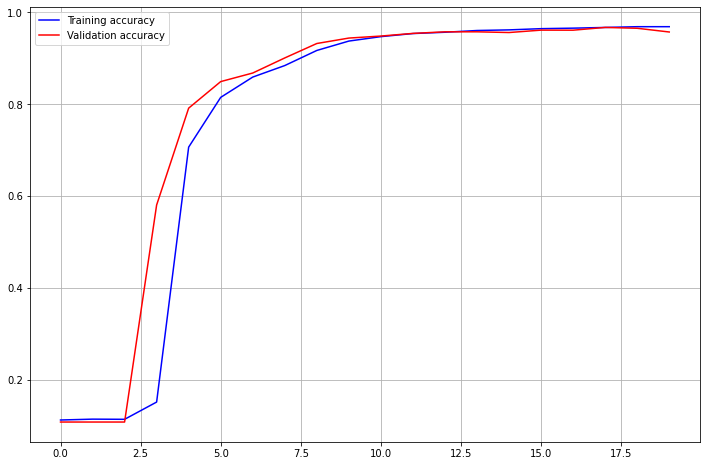

In [86]:
build_model(dense_layers=5, dense_hidden_units=[10,10,10,10,10], conv_layers=3, pool_layers=3, epochs=20, X_train=X_train, y_train=y_train)

Epoch 1/15
1313/1313 [==============================] - 27s 21ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3024 - val_accuracy: 0.1079
Epoch 2/15
1313/1313 [==============================] - 28s 22ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1079
Epoch 3/15
1313/1313 [==============================] - 28s 22ms/step - loss: 2.3014 - accuracy: 0.1138 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 4/15
1313/1313 [==============================] - 28s 22ms/step - loss: 2.3013 - accuracy: 0.1143 - val_loss: 2.3022 - val_accuracy: 0.1079
Epoch 5/15
1313/1313 [==============================] - 29s 22ms/step - loss: 2.3014 - accuracy: 0.1143 - val_loss: 2.3023 - val_accuracy: 0.1079
Epoch 6/15
1313/1313 [==============================] - 29s 22ms/step - loss: 2.3013 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1079
Epoch 7/15
1313/1313 [==============================] - 29s 22ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3022 -

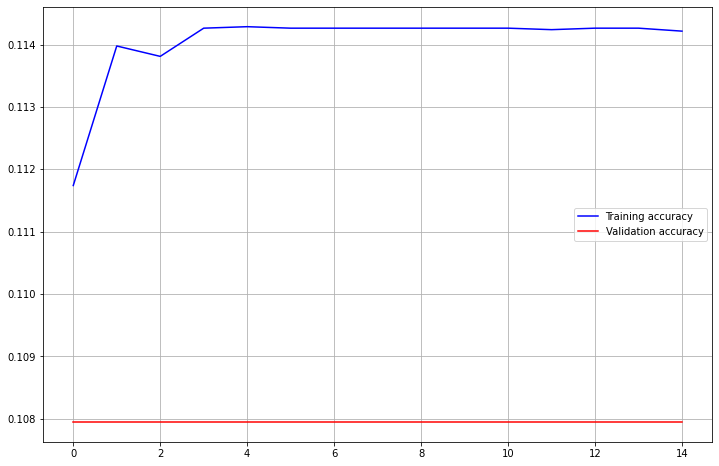

In [87]:
build_model(dense_layers=3, dense_hidden_units=[10,10,10], conv_layers=5, pool_layers=5, epochs=15, X_train=X_train, y_train=y_train)

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3029 - accuracy: 0.1102 - val_loss: 2.3074 - val_accuracy: 0.1079
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3012 - accuracy: 0.1114 - val_loss: 2.2990 - val_accuracy: 0.1079
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2895 - accuracy: 0.1365 - val_loss: 2.2626 - val_accuracy: 0.2014
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.0957 - accuracy: 0.3542 - val_loss: 1.7862 - val_accuracy: 0.5246
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 1.4094 - accuracy: 0.6375 - val_loss: 1.0833 - val_accuracy: 0.7319
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9092 - accuracy: 0.7632 - val_loss: 0.7599 - val_accuracy: 0.8071
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6870 - accuracy: 0.8091 - val_loss: 0.6113 - val_accuracy:

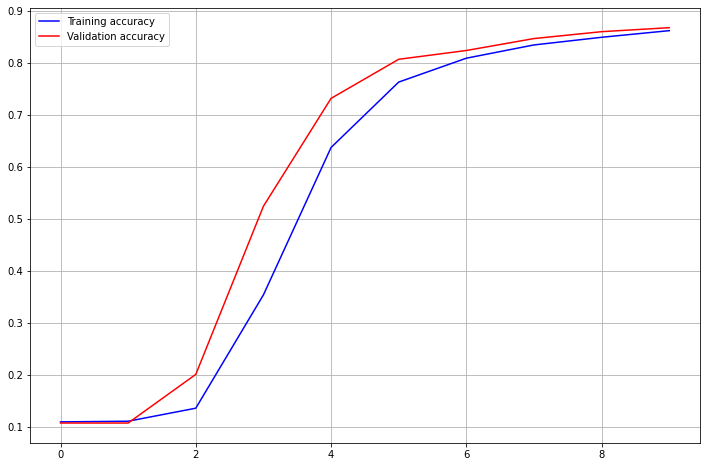

In [88]:
build_model(dense_layers=2, dense_hidden_units=[10,10], conv_layers=2, pool_layers=0, epochs=10, X_train=X_train, y_train=y_train)

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3030 - accuracy: 0.1074 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3012 - accuracy: 0.1144 - val_loss: 2.2989 - val_accuracy: 0.1079
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2889 - accuracy: 0.1393 - val_loss: 2.2601 - val_accuracy: 0.1539
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 2.0732 - accuracy: 0.3641 - val_loss: 1.7427 - val_accuracy: 0.5492
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 1.3723 - accuracy: 0.6158 - val_loss: 1.0665 - val_accuracy: 0.7066
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9216 - accuracy: 0.7344 - val_loss: 0.7830 - val_accuracy: 0.7811
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7176 - accuracy: 0.7906 - val_loss: 0.6504 - val_accuracy:

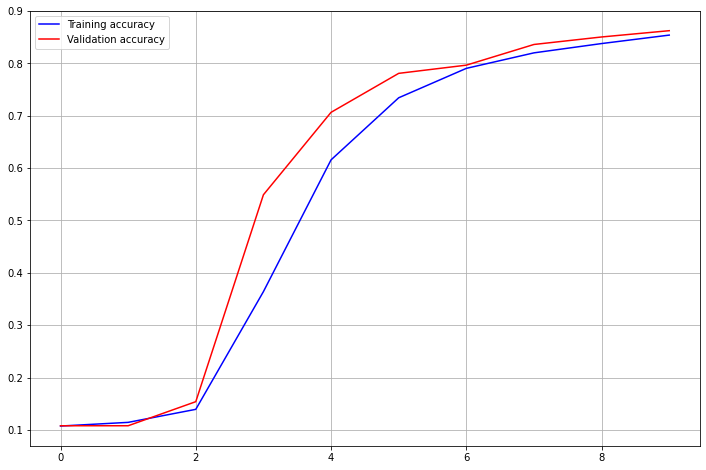

In [89]:
build_model(dense_layers=2, dense_hidden_units=[10,10], conv_layers=0, pool_layers=3, epochs=10, X_train=X_train, y_train=y_train)

Epoch 1/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3020 - accuracy: 0.1127 - val_loss: 2.3088 - val_accuracy: 0.0909
Epoch 2/20
1313/1313 [==============================] - 17s 13ms/step - loss: 2.3018 - accuracy: 0.1113 - val_loss: 2.3025 - val_accuracy: 0.1079
Epoch 3/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3017 - accuracy: 0.1144 - val_loss: 2.3015 - val_accuracy: 0.1079
Epoch 4/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3015 - accuracy: 0.1135 - val_loss: 2.3049 - val_accuracy: 0.1079
Epoch 5/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1079
Epoch 6/20
1313/1313 [==============================] - 16s 12ms/step - loss: 2.3016 - accuracy: 0.1141 - val_loss: 2.3021 - val_accuracy: 0.1079
Epoch 7/20
1313/1313 [==============================] - 16s 13ms/step - loss: 2.3014 - accuracy: 0.1138 - val_loss: 2.3020 -

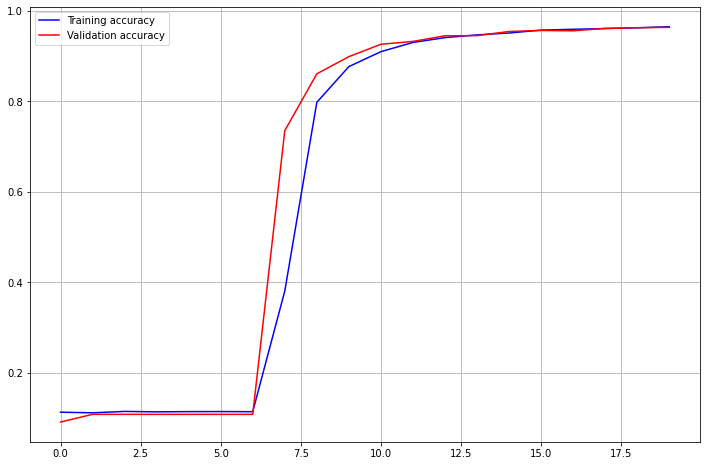

In [90]:
build_model(dense_layers=4, dense_hidden_units=[10,20,20,10], conv_layers=3, pool_layers=3, epochs=20, X_train=X_train, y_train=y_train)

Epoch 1/15
1313/1313 [==============================] - 21s 16ms/step - loss: 2.3018 - accuracy: 0.1130 - val_loss: 2.3033 - val_accuracy: 0.1079
Epoch 2/15
1313/1313 [==============================] - 19s 14ms/step - loss: 2.3016 - accuracy: 0.1134 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 3/15
1313/1313 [==============================] - 19s 15ms/step - loss: 2.3015 - accuracy: 0.1135 - val_loss: 2.3014 - val_accuracy: 0.1079
Epoch 4/15
1313/1313 [==============================] - 19s 14ms/step - loss: 1.7025 - accuracy: 0.3704 - val_loss: 0.4946 - val_accuracy: 0.8466
Epoch 5/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.3494 - accuracy: 0.8946 - val_loss: 0.2580 - val_accuracy: 0.9224
Epoch 6/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2264 - accuracy: 0.9310 - val_loss: 0.1962 - val_accuracy: 0.9397
Epoch 7/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.1770 - accuracy: 0.9446 - val_loss: 0.1656 -

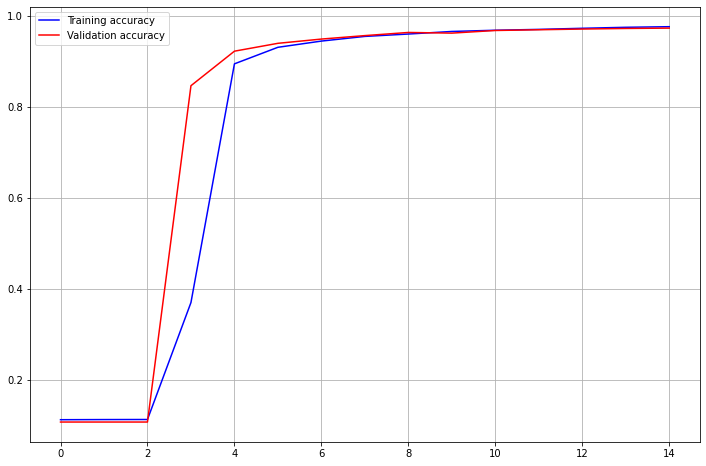

In [93]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='linear'))
model.add(Dense(10, activation='softmax'))

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

epochs=15
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

plot_history(history, epochs)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(10, activation='softmax'))

# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

epochs=20
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

plot_history(history, epochs)

Epoch 1/20
1313/1313 [==============================] - 38s 29ms/step - loss: 0.1682 - accuracy: 0.9483 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 2/20
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0591 - val_accuracy: 0.9840
Epoch 3/20
1313/1313 [==============================] - 37s 29ms/step - loss: 0.0589 - accuracy: 0.9824 - val_loss: 0.0565 - val_accuracy: 0.9847
Epoch 4/20
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0753 - val_accuracy: 0.9794
Epoch 5/20
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0678 - val_accuracy: 0.9832
Epoch 6/20
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0826 - val_accuracy: 0.9824
Epoch 7/20
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0539 -

NameError: name 'plot_history' is not defined